#EZGİ GÜCÜYENER 17050111040
#ASLIHAN ŞİMŞEK 16050111008

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv("data.csv", sep = ',')
data.columns=['x', 'y']

In [2]:
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values.reshape(-1, 1)
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

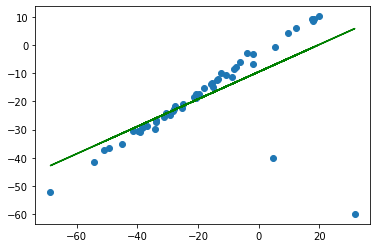

In [3]:
#We plot our data after first training without removing outliers
plt.scatter(X, y)
plt.plot(X, y_pred, color='green', markerfacecolor='blue')
plt.show()


In [4]:
#To calculate the residuals we use predicted values and y values.
residual = ((y - y_pred)**2)
print(residual)

[[3.33057220e+01]
 [1.33093416e+01]
 [2.63425976e+00]
 [3.80598984e+00]
 [2.67844782e+01]
 [4.91114880e+00]
 [9.41826405e+00]
 [4.75049093e-01]
 [1.00774459e+01]
 [2.93129471e+00]
 [1.53205882e+00]
 [4.06448376e+01]
 [1.11550607e-01]
 [1.40450938e+01]
 [1.22878814e+01]
 [1.03645588e+02]
 [1.45382670e+01]
 [4.73329095e+00]
 [5.66076873e-01]
 [2.53949846e+01]
 [2.03386551e+00]
 [1.47690705e+00]
 [1.13278700e+00]
 [3.60412328e-03]
 [1.18488481e+00]
 [1.02044518e+02]
 [1.31003457e+01]
 [9.52300499e+01]
 [9.13188990e+01]
 [6.45922806e-01]
 [9.20021037e+00]
 [2.64319304e+00]
 [9.03236799e+01]
 [2.92555672e-01]
 [6.94611640e-01]
 [5.83896707e+00]
 [2.93273932e+00]
 [1.02357026e+02]
 [3.90813378e+01]
 [4.34743542e+03]
 [7.30959117e+01]
 [1.88636236e+01]
 [7.97786350e+01]
 [2.95331658e+01]
 [1.26036029e+01]
 [5.97182287e-01]
 [2.32489304e-04]
 [1.16174318e+01]
 [5.10207937e+01]
 [1.07419333e+03]]


In [5]:
residual.shape

(50, 1)

In [6]:
#Tukey Method 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10, 8

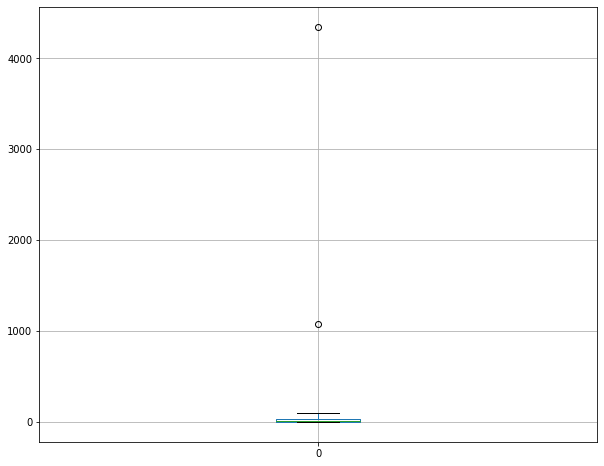

In [7]:
import pandas as pd 
residual = pd.DataFrame(residual.reshape(-1))
bp = residual.boxplot(return_type = 'dict', whis = 3.0)

In [8]:
residual.describe()

,0
count,50.000000
mean,131.708561
std,627.055540
min,0.000232
25%,1.657510
50%,10.847439
75%,37.637434
max,4347.435425


In [9]:
q1 = residual.quantile(0.25)
q3 = residual.quantile(0.75)
iqr = q3-q1 #Interquartile range
residual_outremoved = residual[~((residual < (q1 - 3.0 * iqr)) | (residual > (q3 + 3.0 * iqr))).any(axis=1)]
residual_outremoved.shape
print(residual_outremoved)

             0
0    33.305722
1    13.309342
2     2.634260
3     3.805990
4    26.784478
5     4.911149
6     9.418264
7     0.475049
8    10.077446
9     2.931295
10    1.532059
11   40.644838
12    0.111551
13   14.045094
14   12.287881
15  103.645588
16   14.538267
17    4.733291
18    0.566077
19   25.394985
20    2.033866
21    1.476907
22    1.132787
23    0.003604
24    1.184885
25  102.044518
26   13.100346
27   95.230050
28   91.318899
29    0.645923
30    9.200210
31    2.643193
32   90.323680
33    0.292556
34    0.694612
35    5.838967
36    2.932739
37  102.357026
38   39.081338
40   73.095912
41   18.863624
42   79.778635
43   29.533166
44   12.603603
45    0.597182
46    0.000232
47   11.617432
48   51.020794


In [10]:
a=np.array(residual)
b=np.array(residual_outremoved)

a_rows = a.view([('', a.dtype)] * a.shape[1])
b_rows = b.view([('', b.dtype)] * b.shape[1])

c = np.setdiff1d(a_rows, b_rows).view(a.dtype).reshape(-1, a.shape[1])

print(c)

[[1074.19333007]
 [4347.43542451]]


In [11]:
outlier_1=c[0]
outlier_2=c[1]
first=(np.array(residual)).tolist().index(outlier_1)
second=(np.array(residual)).tolist().index(outlier_2)
print(first,"index of ",outlier_1)
print(second,"index of ",outlier_2)

49 index of  [1074.19333007]
39 index of  [4347.43542451]


In [12]:
new_X=np.delete(X, first, 0)
new_X=np.delete(new_X, second, 0)

new_y=np.delete(y, first, 0)
new_y=np.delete(new_y, second, 0)


In [13]:
new_X=np.array(new_X) 
new_y=np.array(new_y) 

outliers_X=[float(X[39]),float(X[49])]
outliers_y=[float(y[39]),float(y[49])]


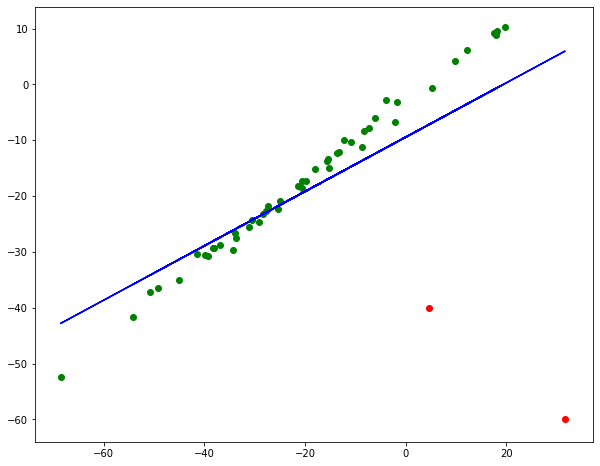

In [14]:
plt.scatter(new_X, new_y, color='green')
plt.plot(X, y_pred, color='blue')
plt.scatter(outliers_X, outliers_y, color='red')

plt.show()

In [15]:
lr2 = LinearRegression()
lr2.fit(new_X, new_y)
y_new_pred = lr2.predict(new_X)



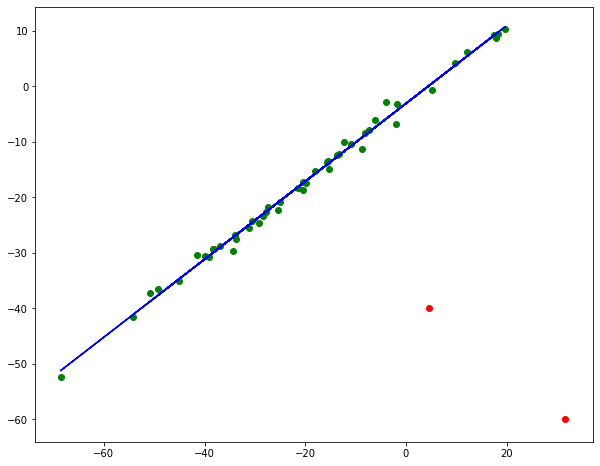

In [16]:
#We plot our data after first training with removing outliers
plt.scatter(new_X, new_y, color='green')
plt.plot(new_X, y_new_pred, color='blue')
plt.scatter(outliers_X, outliers_y, color='red')
plt.show()
